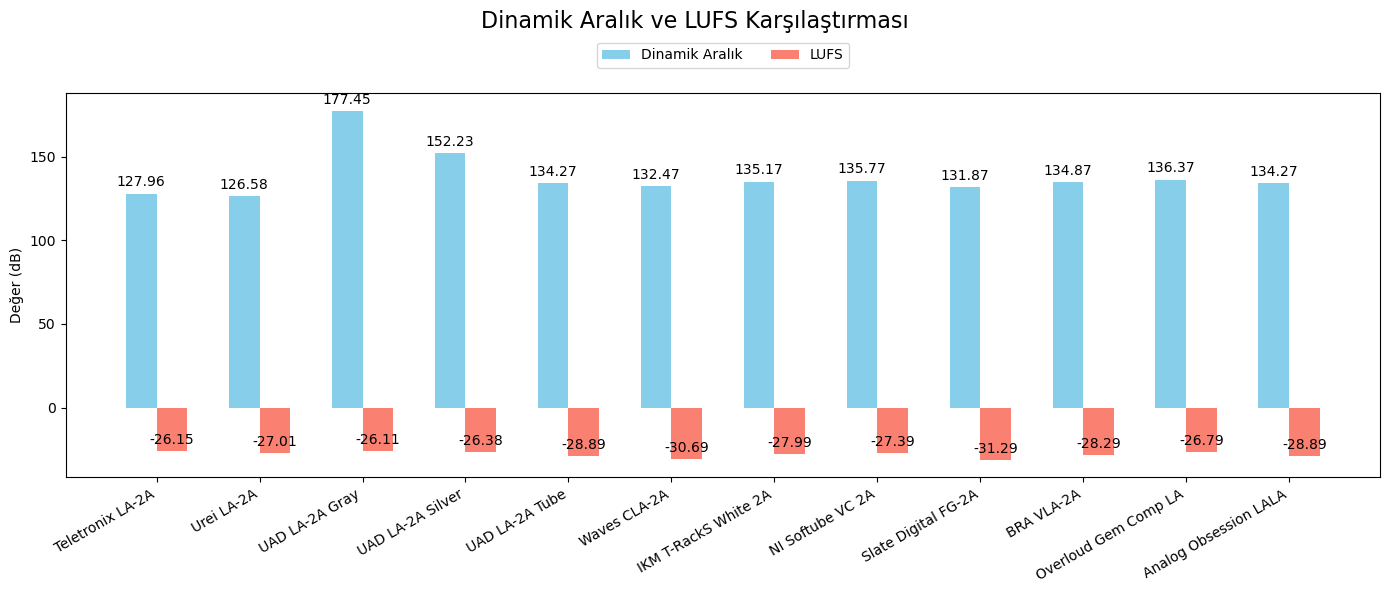

In [1]:
# Ses dosyalarının dinamik aralıkları (DR) ve algılanan ses seviyelerini (LUFS) analiz ederek sonuçları bir grafikle görselleştirir. 

# Önerilen dosya: master kanal saturn.syndicate.L_96khz-03

# Librosa sisteminin aktarılması
import matplotlib.pyplot as plt # Grafik ve görselleştirme işlemleri için Matplotlib kütüphanesini yükler.
import numpy as np # Bilimsel hesaplama ve dizi işlemleri için NumPy kütüphanesini yükler.
import librosa # Ses işleme ve analiz için Librosa kütüphanesini yükler.
import librosa.display # Librosa’nın ses grafikleri çizme fonksiyonlarını yükler.
import pyloudnorm as pyln  # LUFS analizini yapar.
import IPython.display as ipd # Ses dosyalarını Jupyter'da çalmak için gerekli IPython fonksiyonlarını yükler.
from IPython.display import Audio, display  # Ses dosyalarını Jupyter hücresinde oynatmaya olanak tanır.
from scipy import signal # Python'daki SciPy kütüphanesinin signal modülünü içe aktarmaya yarar.

# Ses dosyalarının yollarını bir listeye ekleme
audio_files = [
    "/Users/nazimerensahin/Desktop/la_2a_processed/main templates/Audio Files/saturn.syndicate.L.LA2A Teletronix.ST_02.L.wav", 
    "/Users/nazimerensahin/Desktop/la_2a_processed/main templates/Audio Files/saturn.syndicate.L_LA2A Urei.ST_02.L.wav",     
    "/Users/nazimerensahin/Desktop/la_2a_processed/main templates/Audio Files/saturn.syndicate.L_uad_gray_03.wav",
    "/Users/nazimerensahin/Desktop/la_2a_processed/main templates/Audio Files/saturn.syndicate.L_uad_silver_03.wav",
    "/Users/nazimerensahin/Desktop/fldr/tube.wav",
    "/Users/nazimerensahin/Desktop/fldr/cla_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/white_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/vc_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/fg_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/vla_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/comp_la.wav",
    "/Users/nazimerensahin/Desktop/fldr/lala.wav",
]

# Her dosya için açıklayıcı isimler ekleme
audio_labels = [
    "Teletronix LA-2A",
    "Urei LA-2A",
    "UAD LA-2A Gray",
    "UAD LA-2A Silver",
    "UAD LA-2A Tube",
    "Waves CLA-2A",
    "IKM T-RackS White 2A",
    "NI Softube VC 2A",
    "Slate Digital FG-2A",
    "BRA VLA-2A",
    "Overloud Gem Comp LA",
    "Analog Obsession LALA",
]

# LUFS hesaplama aracı
meter = pyln.Meter(44100)  # Örnekleme hızı belirtilmeli

# Analiz sonuçlarını saklamak için listeler
dr_values = []
lufs_values = []

for file in audio_files:
    # Ses dosyasını yükleme
    y, sr = librosa.load(file, sr=None)
    
    # Dinamik Aralık (DR) Hesaplama
    max_val = np.max(np.abs(y))  # Maksimum genlik
    min_val = np.min(np.abs(y[np.abs(y) > 0]))  # Sıfır olmayan minimum genlik
    
    if min_val > 0:  # Sıfıra bölmeyi önlemek için kontrol
        dynamic_range = 20 * np.log10(max_val / min_val)
    else:
        dynamic_range = -np.inf  # Sonsuz ya da işlenemez değer
    
    dr_values.append(dynamic_range)
    
    # LUFS Hesaplama
    loudness = meter.integrated_loudness(y)
    lufs_values.append(loudness)

# Grafik Çizimi
x = np.arange(len(audio_labels))  # Çubukların x ekseni konumları
width = 0.3  # Çubuk genişliği

fig, ax = plt.subplots(figsize=(14, 6))

# Çubuklar
bar1 = ax.bar(x - width / 2, dr_values, width, label='Dinamik Aralık', color='skyblue')
bar2 = ax.bar(x + width / 2, lufs_values, width, label='LUFS', color='salmon')

# Çubukların üzerine değer yazdırma
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Çubuğun üstüne biraz boşluk
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

# Grafik başlık ve etiketler
ax.set_ylabel('Değer (dB)')
ax.set_xticks(x)
ax.set_xticklabels(audio_labels, rotation=30, ha='right')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

# Genel düzenleme ve gösterim
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle("Dinamik Aralık ve LUFS Karşılaştırması", fontsize=16)
plt.show()